In [3]:
import numpy as np
import numpy.linalg as la
import numpy.random as npr
import matplotlib.pyplot as plt

## First Singular vector for toy data 
Lets generate some example data in two dimensions (so that we can see it) and then examine the first right singular vector of this data.

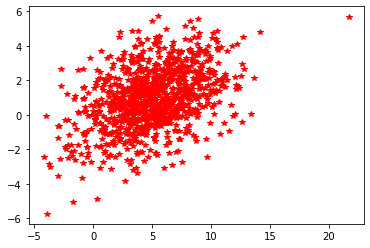

In [5]:
Covariance_Matrix = np.array([[10,2],[2,3]])
center = np.array([5,1])
#center = [0,0]
Data = npr.multivariate_normal(center,Covariance_Matrix,1000)
plt.plot(Data[:,0],Data[:,1],'r*')
plt.show()

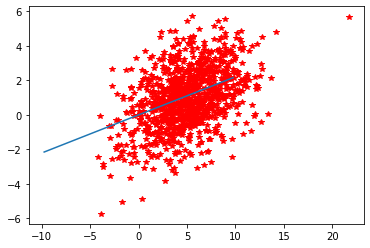

In [6]:
## Now lets find the leading singular vector
[U,S,VT] = la.svd(Data, full_matrices=False)
v1 = VT[0,:].T
Line_of_best_fit = np.zeros([10000,2])
i = 0
# now plot line {tv_1 : for -10< t< 10}
for t in np.linspace(-10,10,10000):
    Line_of_best_fit[i,:] = t*v1
    i +=1
#Line_of_best_fit = np.array([center + (0.01*t - 3)*v1 for t in np.linspace(-3,3,1000)])
plt.plot(Data[:,0],Data[:,1],'r*',Line_of_best_fit[:,0],Line_of_best_fit[:,1])
plt.show()

In [7]:
## Demo SVD for small matrix
A = np.random.randn(4,3)
print(A)

[[-0.08358741  0.38080236 -1.2039944 ]
 [-1.27252654 -1.0819907  -1.40520176]
 [ 0.28014156  0.09022145  0.72035424]
 [ 0.49923083  0.8848031   0.45058723]]


In [12]:
[U,S,VT] = la.svd(A, full_matrices=False)

In [13]:
print(U)

[[-0.28958931 -0.85018228  0.27245138]
 [-0.8354408   0.19514909 -0.48686186]
 [ 0.27396337  0.26442073 -0.05301478]
 [ 0.37831306 -0.41132542 -0.82820602]]


In [17]:
#print(S)
Sigma = np.diag(S)
print(Sigma)

[[2.59497264 0.         0.        ]
 [0.         1.19587307 0.        ]
 [0.         0.         0.20709984]]


In [18]:
print(VT.T)

[[ 0.52136992 -0.2580031   0.81339277]
 [ 0.44436416 -0.73167172 -0.51691101]
 [ 0.72850113  0.63094445 -0.2668243 ]]


In [23]:
# Claim: A = U*Sigma*V^{T}
# Let's check this
# Do this by checking that ||A - U*Sigma*V^{T}||_{2} = 0
reconstruct_A = np.dot(np.dot(U,np.diag(S)),VT)
check_norm = la.norm(A - reconstruct_A,2)
#print(check_norm)
print(A - reconstruct_A)

[[-4.71844785e-16 -1.55431223e-15  2.88657986e-15]
 [ 2.22044605e-16  8.88178420e-16  4.44089210e-16]
 [ 1.66533454e-16  5.41233725e-16 -6.66133815e-16]
 [-1.11022302e-16 -6.66133815e-16  5.55111512e-16]]


## Best Rank k approximation
Now lets fetch some data. We'll work with the MNIST data set, a famous collection of handwritten digits frequently used in machine learning.

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

Images, labels = fetch_openml('mnist_784', version=1, return_X_y=True)
Images = Images / 255.
print(Images.shape)

(70000, 784)


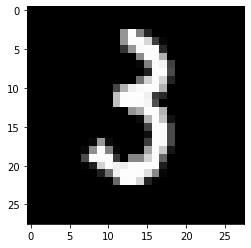

In [27]:
Test_image = np.reshape(Images[1234,:],[28,28])
plt.imshow(Test_image, cmap = "gray")
plt.show()

In [28]:
[U,S,VT] = la.svd(Test_image)

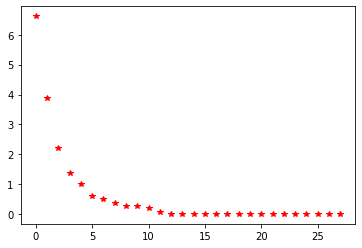

In [29]:
plt.plot(S,'r*')
plt.savefig('DecayingSingVals.png')
plt.show()

In [39]:
U10 = U[:,0:10]
S10 = S[0:10]
VT10 = VT[0:10,:]

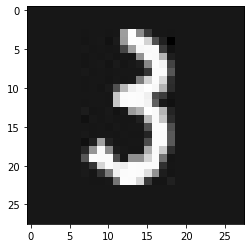

In [40]:
Reconstruct_Test_Image = np.dot(np.dot(U10,np.diag(S10)),VT10)  # k  =10 low rank approx A^{(10)}
plt.imshow(Reconstruct_Test_Image, cmap = "gray")
plt.show()

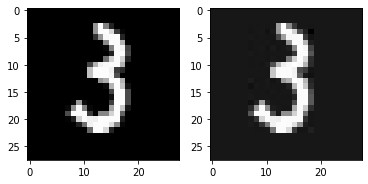

In [41]:
plt.subplot(1,2,1)
plt.imshow(Test_image,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(Reconstruct_Test_Image,cmap="gray")
plt.show()


What this means is that instead of storing all $28\times 28 = 784$ pixel values, we can instead store the first $10$ left singular vectors, the first $10$ right singular vectors and the first $10$ singular values. Thus, we need only store $10\times 28 + 10\times 28 + 10 = 570$ numbers.

This is the basis of **image compression**

## SVD for dimensionality Reduction

Let's look at a few example of dimension reduction using SVD/PCA. 


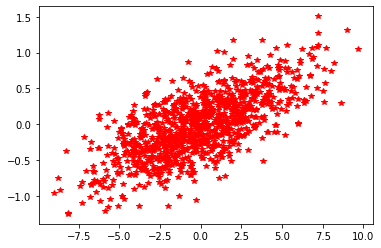

In [17]:
Covariance_Matrix = np.array([[10,1],[1,0.2]])
center = [0,0]
Data = npr.multivariate_normal(center,Covariance_Matrix,1000)
plt.plot(Data[:,0],Data[:,1],'r*')
plt.show()

[-0.09658968  0.99532429]
[-0.99532429 -0.09658968]
0.0


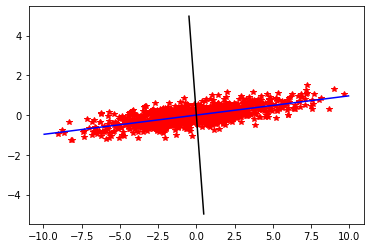

In [18]:
[U,S,VT] = la.svd(Data, full_matrices=False)
v1 = VT[0,:].T
v2 = VT[1,:].T
Line_v1 = np.zeros([10000,2])
i = 0
for t in np.linspace(-10,10,10000):
    Line_v1[i,:] = t*v1
    i +=1

Line_v2 = np.zeros([10000,2])
i = 0
for t in np.linspace(-5,5,10000):
    Line_v2[i,:] = t*v2
    i +=1
print(v2)
print(v1)
print(np.dot(v1,v2))
plt.plot(Data[:,0],Data[:,1],'r*', Line_v1[:,0], Line_v1[:,1], 'b', Line_v2[:,0], Line_v2[:,1],'k')
plt.show()

Here we will look at using singular vectors for dimensionality reduction. We'll use a simple and well studied data set called Iris. This exercise was taken from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html. From the website: 
" The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour and Virginica) with 4 attributes: sepal length, sepal width, petal length and petal width." 

We'll see that although the data set is four dimensional, most of the variance is captured by the first two singular vectors. This means that just by plotting the loadings on the first two singular vectors we can clearly see the distinction between the three classes.

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]
 [1.420e+01 1.760e+00 2.450e+00 1.520e+01 1.120e+02 3.270e+00 3.390e+00
  3.400e-01 1.970e+00 6.750e+00 1.050e+00 2.850e+00 1.450e+03]
 [1.439e+01 1.870e+00 2.450e+00 1.460e+01 9.600e+01 2.500e+00 2.520e+00
  3.000e-01 1.980e+00 5.250e+00 1.020e+00 3.580e+00 1.290e+03]
 [1.406e+01 2.150e+00 2.610e+00 1.760e+01 1.210e+02 2.6

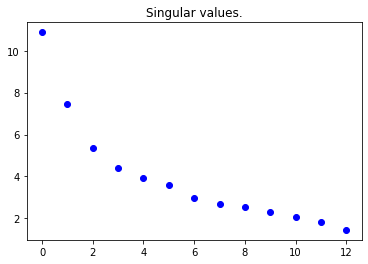

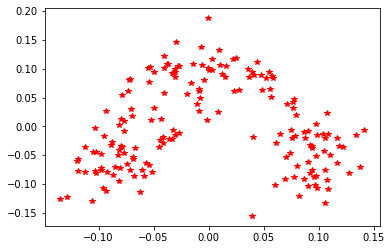

In [4]:
# Load the data
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
print(X[0:10,:])

y = wine.target # The data labels, [1,13].
print(X.shape)
mu = np.mean(X,axis = 0, keepdims = True) # keepdims ensures that mu is a (150,1) array, instead of a (150,) array.
print(mu.shape)

X_temp = X - mu
X_tilde = X_temp/np.max(X_temp,axis = 0) # normalizing 
print(X_tilde[0:10,:])

U,S,Vh = np.linalg.svd(X_tilde)
plt.plot(S,'bo')
plt.title('Singular values.')
plt.show()

Loading_on_sing_vec_1 = U[:,0]
Loading_on_sing_vec_2 = U[:,1]
plt.plot(Loading_on_sing_vec_1,Loading_on_sing_vec_2,'r*')
plt.show()

If  you squint you can sort of see three classes in the above plot. In the next block of code we'll colourize it according to classes and it should become clearer. Also, observe there is a drop off between the 2nd and 3rd singular values. This suggests that most of the information is contained in the first two singular vectors. (Actually the drop off between $\sigma_1$ and $\sigma_2$ is larger, but using only one singular vector is usually a bad idea)

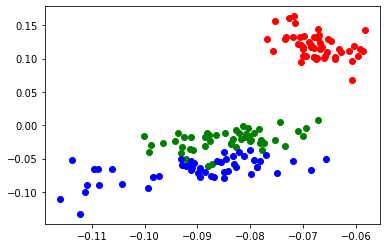

In [24]:
colors = ['red', 'green', 'blue']
for i in range(0,3):
    plt.scatter(Loading_on_sing_vec_1[y == i],Loading_on_sing_vec_2[y == i],color = colors[i])

In the above plot, its clearer that there are three classes. If you were looking to make an algorithm that classifies these irises into the correct classes, you can imagine that first using SVD to get the above gives you a good **representation** of the data that makes classification easy.

## SVD for Spiked Data

A spiked matrix is a matrix of the form $A = \mathbf{u}^{\top}\mathbf{v} + \varepsilon B$, where $\varepsilon$ is a small number. We usually think of $\mathbf{u},\mathbf{v}$ as the signal, and $B$ as noise. SVD is very good at separating signal from noise in this situation, as we'll demonstrate in the next block of code.

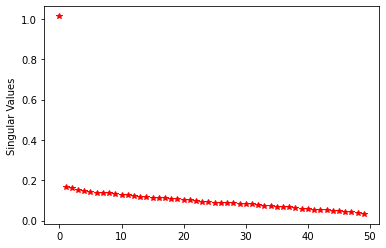

In [21]:

Noise_part = np.random.randn(100,50)
u1 = np.zeros([100,1])
u1[0] = 1
v1 = np.zeros([1,50])
v1[0,0] = 1
# print(v1)
epsilon = 0.01
Rank_one_part = np.dot(u1,v1)
A =Rank_one_part + epsilon*Noise_part
U,S,Vh = np.linalg.svd(A)
plt.plot(S,'r*')
plt.ylabel('Singular Values')
plt.show()

Thus, the singular values provide excellent evidence that $A$ is spiked. The first singular vectors will be an excellent approximation to the signal:

In [22]:
u1_tilde = np.round(np.reshape(U[:,0],(100,1)),2)
print(np.concatenate((u1,u1_tilde),axis = 1))

[[ 1.   -0.99]
 [ 0.   -0.01]
 [ 0.   -0.02]
 [ 0.    0.01]
 [ 0.    0.01]
 [ 0.    0.  ]
 [ 0.   -0.01]
 [ 0.    0.01]
 [ 0.   -0.  ]
 [ 0.   -0.  ]
 [ 0.   -0.01]
 [ 0.    0.01]
 [ 0.    0.02]
 [ 0.   -0.  ]
 [ 0.    0.  ]
 [ 0.    0.01]
 [ 0.   -0.01]
 [ 0.    0.02]
 [ 0.    0.01]
 [ 0.   -0.01]
 [ 0.    0.01]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.01]
 [ 0.   -0.01]
 [ 0.    0.01]
 [ 0.    0.01]
 [ 0.    0.  ]
 [ 0.   -0.  ]
 [ 0.    0.  ]
 [ 0.   -0.02]
 [ 0.    0.01]
 [ 0.    0.03]
 [ 0.   -0.  ]
 [ 0.    0.  ]
 [ 0.   -0.01]
 [ 0.   -0.01]
 [ 0.   -0.  ]
 [ 0.    0.01]
 [ 0.   -0.  ]
 [ 0.    0.01]
 [ 0.    0.  ]
 [ 0.   -0.02]
 [ 0.   -0.01]
 [ 0.    0.01]
 [ 0.   -0.02]
 [ 0.   -0.  ]
 [ 0.    0.01]
 [ 0.    0.01]
 [ 0.    0.01]
 [ 0.    0.01]
 [ 0.    0.01]
 [ 0.    0.  ]
 [ 0.    0.01]
 [ 0.    0.  ]
 [ 0.   -0.01]
 [ 0.   -0.02]
 [ 0.   -0.01]
 [ 0.   -0.01]
 [ 0.   -0.02]
 [ 0.   -0.01]
 [ 0.    0.01]
 [ 0.    0.01]
 [ 0.   -0.  ]
 [ 0.   -0.  ]
 [ 0.    0

We can expand the definition of spiked matrix to any matrix of the form: $A = (\text{low rank part}) + \varepsilon (\text{noise})$. 

**Exercise** Experiment with adding a rank 2 or 3 spike to $A$, and see what happens to the singular values.

**Claim:** If $\mathbf{v}_1$ is a right singular vector of $A$ (with singular value $\sigma_1$ )
*Then* $\mathbf{v}_1$ is an eigenvector of $A^{\top}A$ with eigenvalue $\sigma_{1}^{2}$.

**Recall:** The left singular vector $\mathbf{u}_1 = \frac{1}{\sigma_{1}}A\mathbf{v}_1$.

**Also:** $A^{\top}\mathbf{u}_1 = \mathbf{v}_1$

*Proof:* $A^{\top}A\mathbf{v}_1 = A^{\top}\left(A\mathbf{v}_1)\right) = A^{\top}\left(\frac{1}{\sigma_1}\mathbf{u}_1\right) = \frac{1}{\sigma_1}A^{\top}\mathbf{u}_1 = \frac{1}{\sigma_1}\mathbf{v}_1$